<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step


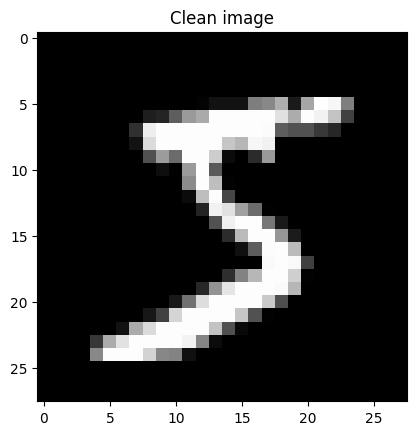

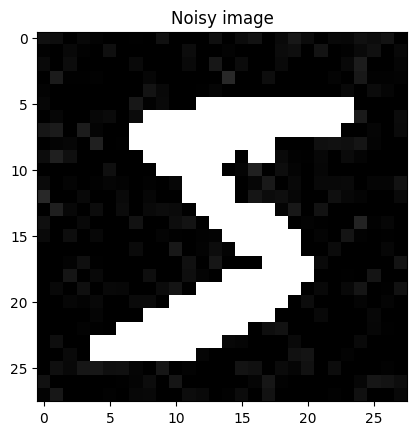

Epoch 1/20
1688/1688 [==============================] - 2476s 1s/step - loss: 0.2204 - accuracy: 0.9417 - val_loss: 0.2419 - val_accuracy: 0.9503
Epoch 2/20
1688/1688 [==============================] - 2402s 1s/step - loss: 0.0851 - accuracy: 0.9771 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 3/20
1688/1688 [==============================] - 2352s 1s/step - loss: 0.0718 - accuracy: 0.9811 - val_loss: 0.0406 - val_accuracy: 0.9882
Epoch 4/20
1688/1688 [==============================] - 2434s 1s/step - loss: 0.0598 - accuracy: 0.9843 - val_loss: 0.0635 - val_accuracy: 0.9828
Epoch 5/20
1688/1688 [==============================] - 2418s 1s/step - loss: 0.0552 - accuracy: 0.9855 - val_loss: 0.0531 - val_accuracy: 0.9883
Epoch 6/20
1688/1688 [==============================] - 2350s 1s/step - loss: 0.0477 - accuracy: 0.9870 - val_loss: 0.0488 - val_accuracy: 0.9870
Epoch 7/20
1688/1688 [==============================] - 2281s 1s/step - loss: 0.0505 - accuracy: 0.9864 - val_loss: 0.0446 -

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

     
# add 5% Gaussian noise to the images in the training and testing datasets


# Add 5% Gaussian noise to the images
noise_factor = 0.05
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)

# Clip the noisy images to ensure that pixel values are between 0 and 1
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

     
# a single image from the dataset with and without noise:


# Plot a single clean image
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.title('Clean image')
plt.show()

# Plot the same image with added noise
plt.figure()
plt.imshow(train_images_noisy[0], cmap='gray')
plt.title('Noisy image')
plt.show()

     
# define the VGG16 model and train it on both the clean and noisy datasets:


# Define the VGG16 model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on clean images
history_clean = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=20, validation_split=0.1)

# Train the model on noisy images
history_noisy = model.fit(train_images_noisy.reshape(-1, 28, 28, 1), train_labels, epochs=20, validation_split=0.1)

     
# evaluate its performance using the test dataset:


# Evaluate the model on clean images
test_loss_clean, test_acc_clean = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=0)
print(f'Clean images - Test loss: {test_loss_clean:.4f}, Test accuracy: {test_acc_clean:.4f}')

# Evaluate the model on noisy images
test_loss_noisy, test_acc_noisy = model.evaluate(test_images_noisy.reshape(-1, 28, 28, 1), test_labels, verbose=0)
print(f'Noisy images - Test loss: {test_loss_noisy:.4f}, Test accuracy: {test_acc_noisy:.4f}')

     
# calculate the precision, recall, and confusion matrix using scikit-learn


# Make predictions on the test dataset
test_preds = np.argmax(model.predict(test_images_noisy.reshape(-1, 28, 28, 1)), axis=-1)

# Print the classification report and confusion matrix
print(classification_report(test_labels, test_preds))
print(confusion_matrix(test_labels, test_preds))

     
# plot the loss and accuracy curves for both the clean and noisy datasets


# Plot the training and validation loss for clean and noisy datasets
plt.plot(history_clean.history['loss'], label='Clean train')
plt.plot(history_clean.history['val_loss'], label='Clean val')
plt.plot(history_noisy.history['loss'], label='Noisy train')
plt.plot(history_noisy.history['val_loss'], label='Noisy val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
